**Atualizando a biblioteca para plotagem de gráficos**


**Importando bibliotecas**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier

**Abrindo um arquivo CSV do drive**

In [2]:
base = pd.read_csv('restaurante.csv', sep=';')
base

,Exemplo,Alternativo,Bar,Sex/Sab,fome,Cliente,Preco,Chuva,Res,Tipo,Tempo,conc
0,X1,Sim,Nao,Nao,Sim,Alguns,RRR,Nao,Sim,Frances,0-10,Sim
1,x2,Sim,Nao,Nao,Sim,Cheio,R,Nao,Nao,Tailandes,30-60,Nao
2,x3,Nao,Sim,Nao,Nao,Alguns,R,Nao,Nao,Hamburger,0-10,Sim
3,x4,Sim,Nao,Sim,Sim,Cheio,R,Sim,Nao,Tailandes,out/30,Sim
4,X5,Sim,Nao,Sim,Nao,Cheio,RRR,Nao,Sim,Frances,>60,Nao
5,X6,Nao,Sim,Nao,Sim,Alguns,RR,Sim,Sim,Italiano,0-10,Sim
6,X7,Nao,Sim,Nao,Nao,Nenhum,R,Sim,Nao,Hamburger,0-10,Nao
7,X8,Nao,Nao,Nao,Sim,Alguns,RR,Sim,Sim,Tailandes,0-10,Sim
8,X9,Nao,Sim,Sim,Nao,Cheio,R,Sim,Nao,Hamburger,>60,Nao
9,X10,Sim,Sim,Sim,Sim,Cheio,RRR,Nao,Sim,Italiano,out/30,Nao


In [3]:
base.head(3)

,Exemplo,Alternativo,Bar,Sex/Sab,fome,Cliente,Preco,Chuva,Res,Tipo,Tempo,conc
0,X1,Sim,Nao,Nao,Sim,Alguns,RRR,Nao,Sim,Frances,0-10,Sim
1,x2,Sim,Nao,Nao,Sim,Cheio,R,Nao,Nao,Tailandes,30-60,Nao
2,x3,Nao,Sim,Nao,Nao,Alguns,R,Nao,Nao,Hamburger,0-10,Sim


In [4]:
base.tail(2)

,Exemplo,Alternativo,Bar,Sex/Sab,fome,Cliente,Preco,Chuva,Res,Tipo,Tempo,conc
10,X11,Nao,Nao,Nao,Nao,Nenhum,R,Nao,Nao,Tailandes,0-10,Nao
11,X12,Sim,Sim,Sim,Sim,Cheio,R,Nao,Nao,Hamburger,30-60,Sim


**Contando quantidade de instâncias**


In [5]:
np.unique(base['conc'], return_counts=True)

(array(['Nao', 'Sim'], dtype=object), array([6, 6], dtype=int64))

c:\Users\tonil\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\tonil\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\tonil\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


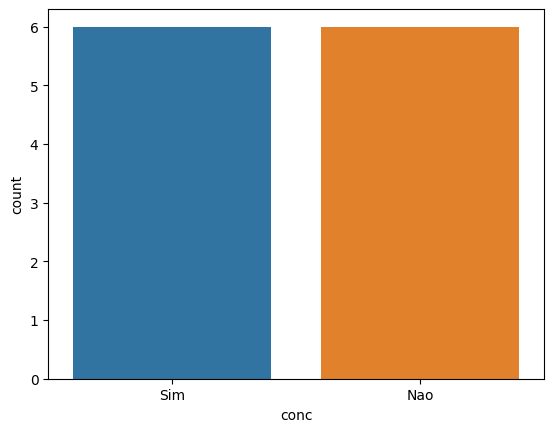

In [6]:
sns.countplot(x = base['conc']);

**Separando os atributos de entrada e de classe**

In [7]:
X_prev = base.iloc[:, 0:11].values
X_prev

array([['X1', 'Sim', 'Nao', 'Nao', 'Sim', 'Alguns', 'RRR', 'Nao', 'Sim',
        'Frances', '0-10'],
       ['x2', 'Sim', 'Nao', 'Nao', 'Sim', 'Cheio', 'R', 'Nao', 'Nao',
        'Tailandes', '30-60'],
       ['x3', 'Nao', 'Sim', 'Nao', 'Nao', 'Alguns', 'R', 'Nao', 'Nao',
        'Hamburger', '0-10'],
       ['x4', 'Sim', 'Nao', 'Sim', 'Sim', 'Cheio', 'R', 'Sim', 'Nao',
        'Tailandes', 'out/30'],
       ['X5', 'Sim', 'Nao', 'Sim', 'Nao', 'Cheio', 'RRR', 'Nao', 'Sim',
        'Frances', '>60'],
       ['X6', 'Nao', 'Sim', 'Nao', 'Sim', 'Alguns', 'RR', 'Sim', 'Sim',
        'Italiano', '0-10'],
       ['X7', 'Nao', 'Sim', 'Nao', 'Nao', 'Nenhum', 'R', 'Sim', 'Nao',
        'Hamburger', '0-10'],
       ['X8', 'Nao', 'Nao', 'Nao', 'Sim', 'Alguns', 'RR', 'Sim', 'Sim',
        'Tailandes', '0-10'],
       ['X9', 'Nao', 'Sim', 'Sim', 'Nao', 'Cheio', 'R', 'Sim', 'Nao',
        'Hamburger', '>60'],
       ['X10', 'Sim', 'Sim', 'Sim', 'Sim', 'Cheio', 'RRR', 'Nao', 'Sim',
        'Italiano', 

In [8]:
X_prev_label = base.iloc[:, 0:11]
X_prev_label

,Exemplo,Alternativo,Bar,Sex/Sab,fome,Cliente,Preco,Chuva,Res,Tipo,Tempo
0,X1,Sim,Nao,Nao,Sim,Alguns,RRR,Nao,Sim,Frances,0-10
1,x2,Sim,Nao,Nao,Sim,Cheio,R,Nao,Nao,Tailandes,30-60
2,x3,Nao,Sim,Nao,Nao,Alguns,R,Nao,Nao,Hamburger,0-10
3,x4,Sim,Nao,Sim,Sim,Cheio,R,Sim,Nao,Tailandes,out/30
4,X5,Sim,Nao,Sim,Nao,Cheio,RRR,Nao,Sim,Frances,>60
5,X6,Nao,Sim,Nao,Sim,Alguns,RR,Sim,Sim,Italiano,0-10
6,X7,Nao,Sim,Nao,Nao,Nenhum,R,Sim,Nao,Hamburger,0-10
7,X8,Nao,Nao,Nao,Sim,Alguns,RR,Sim,Sim,Tailandes,0-10
8,X9,Nao,Sim,Sim,Nao,Cheio,R,Sim,Nao,Hamburger,>60
9,X10,Sim,Sim,Sim,Sim,Cheio,RRR,Nao,Sim,Italiano,out/30


In [9]:
X_prev[:,5]

array(['Alguns', 'Cheio', 'Alguns', 'Cheio', 'Cheio', 'Alguns', 'Nenhum',
       'Alguns', 'Cheio', 'Cheio', 'Nenhum', 'Cheio'], dtype=object)

In [10]:
y_classe = base.iloc[:, 11].values
y_classe

array(['Sim', 'Nao', 'Sim', 'Sim', 'Nao', 'Sim', 'Nao', 'Sim', 'Nao',
       'Nao', 'Nao', 'Sim'], dtype=object)

**Tratamento de dados categóricos**

> *LabelEncoder - Vamos tratar os dados categóricos colocando 1, 2, 3 e etc**



In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
label_encoder = LabelEncoder()

In [13]:
X_prev[:,0]
X_prev

array([['X1', 'Sim', 'Nao', 'Nao', 'Sim', 'Alguns', 'RRR', 'Nao', 'Sim',
        'Frances', '0-10'],
       ['x2', 'Sim', 'Nao', 'Nao', 'Sim', 'Cheio', 'R', 'Nao', 'Nao',
        'Tailandes', '30-60'],
       ['x3', 'Nao', 'Sim', 'Nao', 'Nao', 'Alguns', 'R', 'Nao', 'Nao',
        'Hamburger', '0-10'],
       ['x4', 'Sim', 'Nao', 'Sim', 'Sim', 'Cheio', 'R', 'Sim', 'Nao',
        'Tailandes', 'out/30'],
       ['X5', 'Sim', 'Nao', 'Sim', 'Nao', 'Cheio', 'RRR', 'Nao', 'Sim',
        'Frances', '>60'],
       ['X6', 'Nao', 'Sim', 'Nao', 'Sim', 'Alguns', 'RR', 'Sim', 'Sim',
        'Italiano', '0-10'],
       ['X7', 'Nao', 'Sim', 'Nao', 'Nao', 'Nenhum', 'R', 'Sim', 'Nao',
        'Hamburger', '0-10'],
       ['X8', 'Nao', 'Nao', 'Nao', 'Sim', 'Alguns', 'RR', 'Sim', 'Sim',
        'Tailandes', '0-10'],
       ['X9', 'Nao', 'Sim', 'Sim', 'Nao', 'Cheio', 'R', 'Sim', 'Nao',
        'Hamburger', '>60'],
       ['X10', 'Sim', 'Sim', 'Sim', 'Sim', 'Cheio', 'RRR', 'Nao', 'Sim',
        'Italiano', 

In [14]:
label_encoder_Exemplo = LabelEncoder()
label_encoder_Alternativo = LabelEncoder()
label_encoder_Bar = LabelEncoder()
label_encoder_SexSab = LabelEncoder()
label_encoder_fome = LabelEncoder()
label_encoder_chuva = LabelEncoder()
label_encoder_Res = LabelEncoder()

In [15]:
X_prev[:,0] = label_encoder_Alternativo.fit_transform(X_prev[:,0])
X_prev[:,1] = label_encoder_Bar.fit_transform(X_prev[:,1])
X_prev[:,2] = label_encoder_SexSab.fit_transform(X_prev[:,2])
X_prev[:,3] = label_encoder_fome.fit_transform(X_prev[:,3])
X_prev[:,4] = label_encoder_chuva.fit_transform(X_prev[:,4])
# X_prev[:,5] = label_encoder_Res.fit_transform(X_prev[:,5])
# X_prev[:,6] = label_encoder_Alternativo.fit_transform(X_prev[:,6])
X_prev[:,7] = label_encoder_Bar.fit_transform(X_prev[:,7])
X_prev[:,8] = label_encoder_Bar.fit_transform(X_prev[:,8])
X_prev[:,9] = label_encoder_SexSab.fit_transform(X_prev[:,9])
# X_prev[:,10] = label_encoder_SexSab.fit_transform(X_prev[:,10])

X_prev

array([[0, 1, 0, 0, 1, 'Alguns', 'RRR', 0, 1, 0, '0-10'],
       [9, 1, 0, 0, 1, 'Cheio', 'R', 0, 0, 3, '30-60'],
       [10, 0, 1, 0, 0, 'Alguns', 'R', 0, 0, 1, '0-10'],
       [11, 1, 0, 1, 1, 'Cheio', 'R', 1, 0, 3, 'out/30'],
       [4, 1, 0, 1, 0, 'Cheio', 'RRR', 0, 1, 0, '>60'],
       [5, 0, 1, 0, 1, 'Alguns', 'RR', 1, 1, 2, '0-10'],
       [6, 0, 1, 0, 0, 'Nenhum', 'R', 1, 0, 1, '0-10'],
       [7, 0, 0, 0, 1, 'Alguns', 'RR', 1, 1, 3, '0-10'],
       [8, 0, 1, 1, 0, 'Cheio', 'R', 1, 0, 1, '>60'],
       [1, 1, 1, 1, 1, 'Cheio', 'RRR', 0, 1, 2, 'out/30'],
       [2, 0, 0, 0, 0, 'Nenhum', 'R', 0, 0, 3, '0-10'],
       [3, 1, 1, 1, 1, 'Cheio', 'R', 0, 0, 1, '30-60']], dtype=object)



> OneHotEncoder - Agora vamos binarizar atributos não ordinais

**Contando quantas opções de resposta tem cada atributo**

In [16]:
len(np.unique(base['Cliente']))

3

In [17]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [18]:
X_prev

array([[0, 1, 0, 0, 1, 'Alguns', 'RRR', 0, 1, 0, '0-10'],
       [9, 1, 0, 0, 1, 'Cheio', 'R', 0, 0, 3, '30-60'],
       [10, 0, 1, 0, 0, 'Alguns', 'R', 0, 0, 1, '0-10'],
       [11, 1, 0, 1, 1, 'Cheio', 'R', 1, 0, 3, 'out/30'],
       [4, 1, 0, 1, 0, 'Cheio', 'RRR', 0, 1, 0, '>60'],
       [5, 0, 1, 0, 1, 'Alguns', 'RR', 1, 1, 2, '0-10'],
       [6, 0, 1, 0, 0, 'Nenhum', 'R', 1, 0, 1, '0-10'],
       [7, 0, 0, 0, 1, 'Alguns', 'RR', 1, 1, 3, '0-10'],
       [8, 0, 1, 1, 0, 'Cheio', 'R', 1, 0, 1, '>60'],
       [1, 1, 1, 1, 1, 'Cheio', 'RRR', 0, 1, 2, 'out/30'],
       [2, 0, 0, 0, 0, 'Nenhum', 'R', 0, 0, 3, '0-10'],
       [3, 1, 1, 1, 1, 'Cheio', 'R', 0, 0, 1, '30-60']], dtype=object)

In [19]:
X_prev[:,0:11]

array([[0, 1, 0, 0, 1, 'Alguns', 'RRR', 0, 1, 0, '0-10'],
       [9, 1, 0, 0, 1, 'Cheio', 'R', 0, 0, 3, '30-60'],
       [10, 0, 1, 0, 0, 'Alguns', 'R', 0, 0, 1, '0-10'],
       [11, 1, 0, 1, 1, 'Cheio', 'R', 1, 0, 3, 'out/30'],
       [4, 1, 0, 1, 0, 'Cheio', 'RRR', 0, 1, 0, '>60'],
       [5, 0, 1, 0, 1, 'Alguns', 'RR', 1, 1, 2, '0-10'],
       [6, 0, 1, 0, 0, 'Nenhum', 'R', 1, 0, 1, '0-10'],
       [7, 0, 0, 0, 1, 'Alguns', 'RR', 1, 1, 3, '0-10'],
       [8, 0, 1, 1, 0, 'Cheio', 'R', 1, 0, 1, '>60'],
       [1, 1, 1, 1, 1, 'Cheio', 'RRR', 0, 1, 2, 'out/30'],
       [2, 0, 0, 0, 0, 'Nenhum', 'R', 0, 0, 3, '0-10'],
       [3, 1, 1, 1, 1, 'Cheio', 'R', 0, 0, 1, '30-60']], dtype=object)

In [20]:
onehotencoder_restaurante = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [5, 6, 10])], remainder='passthrough')
X_prev = onehotencoder_restaurante.fit_transform(X_prev)
X_prev


array([[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0, 1, 0, 0, 1,
        0, 1, 0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 9, 1, 0, 0, 1,
        0, 0, 3],
       [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 10, 0, 1, 0, 0,
        0, 0, 1],
       [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 11, 1, 0, 1, 1,
        1, 0, 3],
       [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 4, 1, 0, 1, 0,
        0, 1, 0],
       [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 5, 0, 1, 0, 1,
        1, 1, 2],
       [0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 6, 0, 1, 0, 0,
        1, 0, 1],
       [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 7, 0, 0, 0, 1,
        1, 1, 3],
       [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 8, 0, 1, 1, 0,
        1, 0, 1],
       [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1, 1, 1, 1, 1,
        0, 1, 2],
       [0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 2, 0, 0, 0, 0,
        0, 0, 3

In [21]:
X_prev.shape

(12, 18)

**Método de amostragem Holdout**

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_prev

array([[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0, 1, 0, 0, 1,
        0, 1, 0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 9, 1, 0, 0, 1,
        0, 0, 3],
       [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 10, 0, 1, 0, 0,
        0, 0, 1],
       [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 11, 1, 0, 1, 1,
        1, 0, 3],
       [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 4, 1, 0, 1, 0,
        0, 1, 0],
       [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 5, 0, 1, 0, 1,
        1, 1, 2],
       [0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 6, 0, 1, 0, 0,
        1, 0, 1],
       [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 7, 0, 0, 0, 1,
        1, 1, 3],
       [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 8, 0, 1, 1, 0,
        1, 0, 1],
       [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1, 1, 1, 1, 1,
        0, 1, 2],
       [0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 2, 0, 0, 0, 0,
        0, 0, 3

In [24]:
y_classe

array(['Sim', 'Nao', 'Sim', 'Sim', 'Nao', 'Sim', 'Nao', 'Sim', 'Nao',
       'Nao', 'Nao', 'Sim'], dtype=object)

In [25]:
y_classe.shape

(12,)

In [26]:
#X_train_ds, X_test_ds, y_train_ds, y_test_ds = train_test_split(X, y, test_size=0.3, random_state=123, shuffle=True, stratify=y)
X_treino, X_teste, y_treino, y_teste = train_test_split(X_prev, y_classe, test_size = 0.20, random_state = 23)

In [27]:
X_treino.shape

(9, 18)

In [28]:
X_teste.shape

(3, 18)

**Vamos experimentar agora o algoritmo Decision Tree?**

In [29]:
modelo = DecisionTreeClassifier(criterion='entropy')
Y = modelo.fit(X_treino, y_treino)

**Vamos testar o modelo?**

In [30]:
previsoes = modelo.predict(X_teste)

**Será se o modelo acertou?**

In [31]:
y_teste

array(['Sim', 'Nao', 'Sim'], dtype=object)

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste,previsoes)

0.3333333333333333

In [33]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[0, 1],
       [1, 1]], dtype=int64)

0.3333333333333333

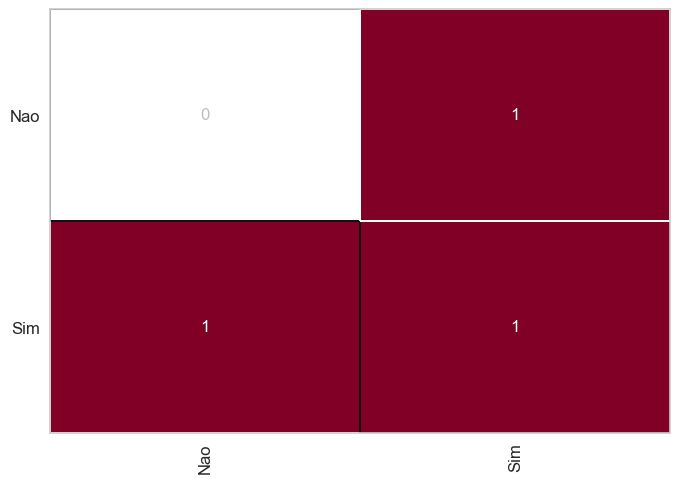

In [34]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [35]:
print(classification_report(y_teste, previsoes, zero_division = 1))

              precision    recall  f1-score   support

         Nao       0.00      0.00      1.00         1
         Sim       0.50      0.50      0.50         2

    accuracy                           0.33         3
   macro avg       0.25      0.25      0.75         3
weighted avg       0.33      0.33      0.67         3



**Vamos ver a árvore?**

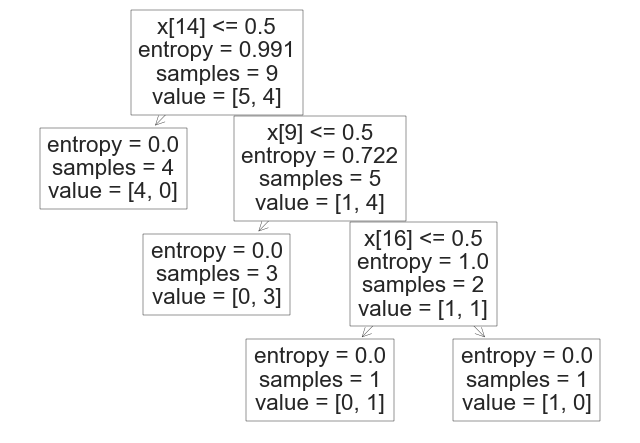

In [36]:
from sklearn import tree
plt.show(tree.plot_tree(Y))

**O que você achou? podemos fazê-la melhor! :-)**

[Text(0.3333333333333333, 0.875, 'Sex/Sab <= 0.5\nentropy = 0.991\nsamples = 9\nvalue = [5, 4]\nclass = Nao'),
 Text(0.16666666666666666, 0.625, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = Nao'),
 Text(0.5, 0.625, '30-60 <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]\nclass = Sim'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Sim'),
 Text(0.6666666666666666, 0.375, 'Chuva <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = Nao'),
 Text(0.5, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Sim'),
 Text(0.8333333333333334, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Nao')]

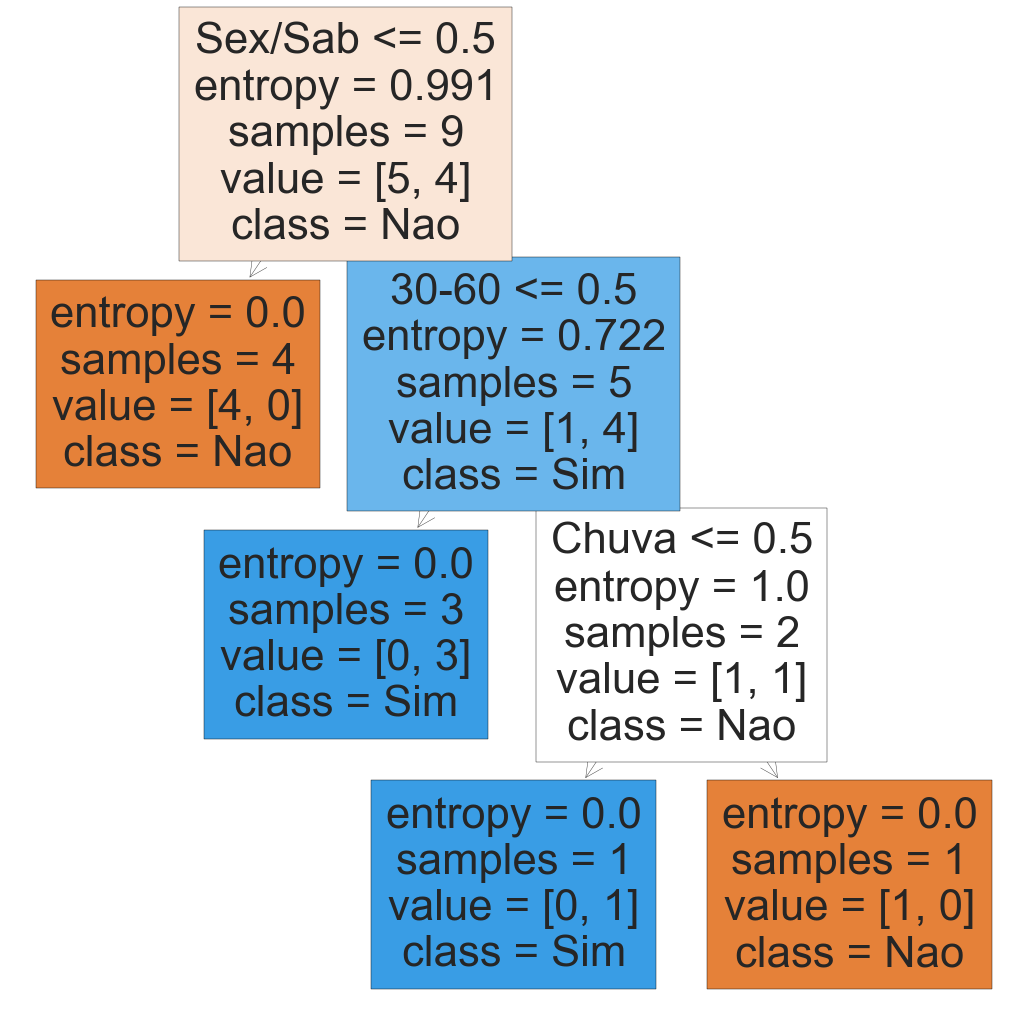

In [37]:
from sklearn import tree
previsores = ['Alguns', 'Cheio', 'Nenhum', 'R', 'RR', 'RRR', '0-10', '30-60', '>60', 'out/30', 'Exemplo', 'Alt', 'Bar', 'Sex/Sab', 'Fome', 'Chuva', 'Res', 'Tipo']

figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(13, 13))
tree.plot_tree(modelo, feature_names=previsores, class_names=list(modelo.classes_), filled=True)

In [38]:
list(modelo.classes_)

['Nao', 'Sim']